# Resampling Datetime Data

By: Paul Montecinos
6/7/23

## Imports and Loading Data

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as pdr
import numpy as np


#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Uploading data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Cleaning and formating data

In [2]:
# Convert the "date" column to datetime format
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
# selecting data for the year 2000 and beyond
df = df[df['date'].dt.year >= 2000]
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
7670,2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
7671,2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
7672,2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
7673,2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
7674,2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


In [3]:
# Confirming Dtype change to date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 7670 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              7671 non-null   datetime64[ns]
 1   cloud_cover       7282 non-null   float64       
 2   sunshine          7287 non-null   float64       
 3   global_radiation  7282 non-null   float64       
 4   max_temp          7281 non-null   float64       
 5   mean_temp         7252 non-null   float64       
 6   min_temp          7285 non-null   float64       
 7   precipitation     7281 non-null   float64       
 8   pressure          7284 non-null   float64       
 9   snow_depth        5919 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 659.2 KB


In [4]:
# Setting 'date' column as the index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [5]:
# Dropping columns 
df = df.drop(columns=['cloud_cover', 'sunshine', 'global_radiation','pressure'])
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [7]:
df.value_counts()

max_temp  mean_temp  min_temp  precipitation  snow_depth
12.9      8.9        4.9       0.0            0.0           2
19.2      11.4       7.1       0.0            0.0           2
11.2      7.9        4.6       0.0            0.0           2
18.3      13.4       8.5       0.0            0.0           2
10.4      8.8        7.2       0.0            0.0           2
                                                           ..
11.4      10.2       9.2       0.0            0.0           1
                     7.6       2.6            0.0           1
                     5.3       1.0            0.0           1
          10.1       8.5       1.6            0.0           1
37.9      26.6       18.3      0.0            0.0           1
Length: 5884, dtype: int64

In [8]:
# Checking missing data
df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [9]:
# Creating filters to fill for temps
temp_fill = ['mean_temp', 'max_temp', 'min_temp']
df[temp_fill] = df[temp_fill].ffill()


Forward filled temps since they usually do not drastically change.

In [10]:
df = df.fillna(0)

Filled NA for snow and precipitation since I am assuming no blanks fields meant there wasn't any snow or precipitation

In [11]:
df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

## Q1: What month had the most precipitation between 2000 through 2010?

In [12]:
# Create DataFrame with precipitation resampled to calendar month freq
df_monthly = df['precipitation'].resample('M').sum()

In [13]:
# Set time from 2000 to 2010
start_date = '2000-01-01'
end_date = '2010-12-31'
df_monthly_period = df_monthly.loc[start_date:end_date]

In [14]:
# Find the date & value for the max precipitation
max_precipitation_date = df_monthly_period.idxmax()
max_precipitation_value = df_monthly_period.max()

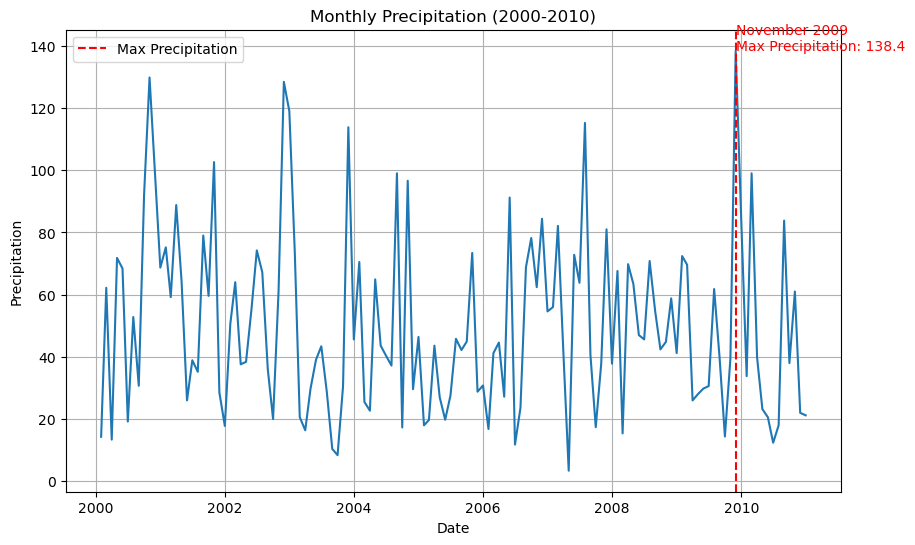

In [15]:
# Plot the precipitation
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_period.index, df_monthly_period.values)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Monthly Precipitation (2000-2010)')
plt.grid(True)

# Add vertical line at the date with maximum precipitation
plt.axvline(x=max_precipitation_date, color='r', linestyle='--', label='Max Precipitation')
plt.text(max_precipitation_date, max_precipitation_value, f"{max_precipitation_date.strftime('%B %Y')}\nMax Precipitation: {max_precipitation_value}", color='r')

plt.legend()
plt.show()

## Q2: Which year between 2000-2020 had the coolest average temperature?

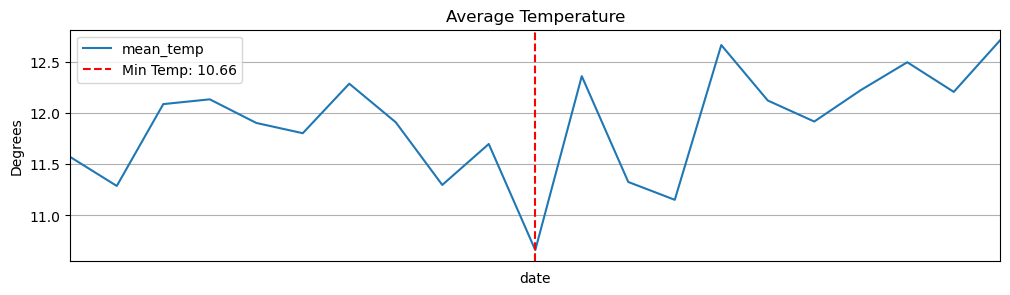

In [16]:
fig, ax = plt.subplots(figsize=(12, 3))

# Resample the data as yearly freq
df_yearly = df.mean_temp.resample('Y').mean()

# Plot the avg temp over time for the specified period
df_yearly.plot(ax=ax)

# Determine the date and value for the lowest mean temp
min_temp_date = df_yearly.idxmin()
min_temp_value = df_yearly.min()

# Add a vertical line at the date with the lowest mean temp
ax.axvline(x=min_temp_date, color='red', linestyle='--', label=f'Min Temp: {min_temp_value:.2f}')

# Set title and ylabel
ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')

# Customize major x-axis ticks
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)

# Customize minor x-axis ticks
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_formatter(mticks.NullFormatter())

# Add legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()
